<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  Regresión Logística </h2> 

---

# Aspectos teóricos

## Introducción

La **Regresión Logística** es una de las técnicas de clasificación binaria más sencillas que existen, es un método estadístico para predecir la pertenencia o no a una clase. El resultado o variable objetivo es de naturaleza dicotómica, es decir que solo hay dos clases posibles.Por ejemplo se puede usar en problemas de clasificación de correos spam, toma de decisiones a la hora de comprar o no comprar un producto, en la actualidad y con la presencia del Covid, podemos determinar si una persona tiene o no una mascarilla puesta, en fin existen muchos problemas que se pueden abordar con esta técnica.

## Modelo general

La Regresión Logística lleva el nombre de la función utilizada en el núcleo del método, la función logística es también llamada **función sigmoide**, cuya ecuación es:
$$y = \frac{1}{1+e^{-x}}$$

Esta función tomar cualquier número de valor real y asignar a un valor entre 0 y 1. A continuación veremos su gráfica:

### Gráfica

In [2]:
import numpy as np
from matplotlib import pyplot as plt

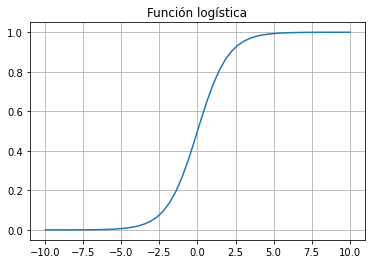

In [4]:
x = np.linspace(-10,10)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.title('Función logística')
plt.grid()
plt.axis
plt.show()

## Transformar un problema de regresión en un problema de clasificación

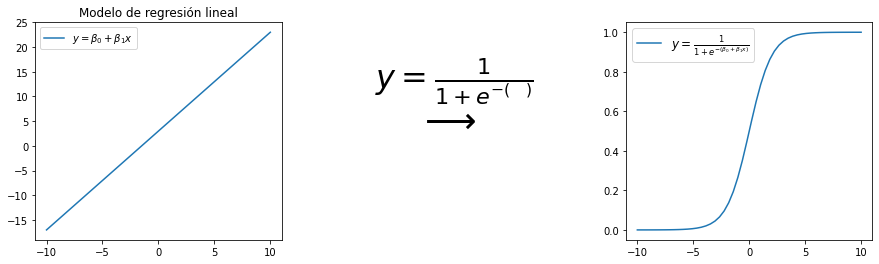

In [111]:
x = np.linspace(-10,10)
a,b = 3,2
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
y1 = a + b*x
plt.plot(x,y1, label=r'$y=\beta_0 + \beta_1 x$')
plt.title('Modelo de regresión lineal')
plt.legend()
plt.subplot(1,3,2)
#plt.plot(x,y,'w')
plt.text(0.18, 0.7, r'$y = \frac{1}{1+e^{-( \quad )}}$',fontsize = 32)
plt.text(0.35, 0.5, r'$\longrightarrow$',fontsize = 36)
#plt.annotate('Help here!', xy=(8, 0.4),xytext=(7.05, 0.6),arrowprops=dict(arrowstyle='->',lw=1))
plt.axis('off')
plt.subplot(1,3,3)
y2 = 1/(1+np.exp(-x))
plt.plot(x,y2, label=r'$y=\frac{1}{1+e^{-(\beta_0 + \beta_1 x)}}$')
plt.legend(fontsize='large')
plt.show()

## Diferencia entre la regresión lineal y la logística

La **Regresión Lineal** proporciona una salida continua, pero la **Regresión Logística** proporciona una salida discreta. Un ejemplo de una salida continua es conocer el porcentaje de probabilidad de lluvia o el precio de una acción. Un ejemplo de una salida discreta, por su parte, es conocer si va a llover o no, o si el precio de una acción subirá o no.

## Tipos de modelos de Regresión Logística

* **Regresión Logística Binaria:** la variable objetivo tiene solo dos resultados posible, Llueve o NO Llueve, Sube o Baja.
* **Regresión Logística Multinomial:** la variable objetivo tiene tres o más categorías nominales, como predecir el tipo de vino.
* **Regresión Logística Ordinal:** la variable objetivo tiene tres o más categorías ordinales, como clasificar un restaurante o un producto del 1 al 5

# Práctica

El siguiente conjunto de datos contiene información sobre las visitas a un sitio web, en el se registran las siguientes características:
1) Tiempo de conexión.

2) cantidad de páginas visitadas durante la sesión 

3) Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)

4) Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia)

5) Sistema operativo que usa: 0-Windows, 1-Macintosh, 2-Linux

In [77]:
import pandas as pd

In [78]:
dataset = pd.read_csv('datos/usuarios_win_mac_lin.csv')

### Dataset

In [80]:
dataset.head(10)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
5,125.0,5,10,20,2
6,133.0,2,2,4,2
7,162.0,2,6,12,2
8,170.0,2,4,8,2
9,217.0,2,6,6,2


### Número de clases

In [81]:
print(dataset.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


<Figure size 1224x360 with 0 Axes>

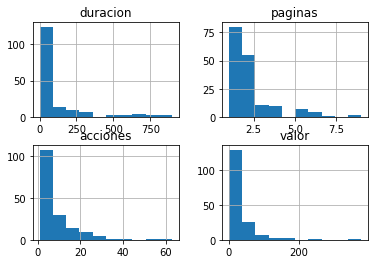

In [83]:
plt.figure(figsize=(17,5))
dataset.drop(['clase'],1).hist()
plt.show()

## Modelo

In [101]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [96]:
modelo_RL = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)

In [87]:
X = dataset.drop('clase',axis=1)

In [89]:
Y = dataset['clase']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.80,random_state=1)

In [97]:
modelo_RL.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Predicción del modelo

In [100]:
prediccion = modelo_RL.predict(X_test)

### Evaluación del modelo

In [105]:
print("Matriz de Confusión :\n",metrics.confusion_matrix(y_test, prediccion))

Matriz de Confusión :
 [[11  0  2]
 [ 9  1  0]
 [ 2  0  9]]


In [116]:
print("Tasa de acierto: {:4f}".format(metrics.accuracy_score(y_test,prediccion)))

Tasa de acierto: 0.617647


In [114]:
print('Reporte de clasificacion:\n')
print(metrics.classification_report(y_test, prediccion))

Reporte de clasificacion:

              precision    recall  f1-score   support

           0       0.50      0.85      0.63        13
           1       1.00      0.10      0.18        10
           2       0.82      0.82      0.82        11

    accuracy                           0.62        34
   macro avg       0.77      0.59      0.54        34
weighted avg       0.75      0.62      0.56        34

